In [1]:
import numpy as np
from sklearn import datasets
from sklearn.model_selection import train_test_split
from keras import models
from keras import layers
from keras import regularizers
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from keras.utils import to_categorical

Using TensorFlow backend.


In [2]:
iris = datasets.load_iris()

In [3]:
X = iris.data[:,:3]
y = iris.target

In [4]:
print(X.shape, y.shape)

(150, 3) (150,)


In [5]:
y = to_categorical(y)

In [6]:
y.shape

(150, 3)

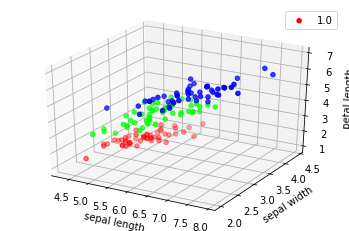

In [7]:
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.scatter3D(X[:,0], X[:,1], X[:, 2], c=y, cmap=plt.cm.Set1)
ax.set_xlabel('sepal length')
ax.set_ylabel('sepal width')
ax.set_zlabel('petal length')
# ax.plot(y,)
plt.legend(y[0])
plt.legend(y[1])
plt.legend(y[2])
plt.show()

In [8]:
train_data, test_data, train_target, test_target = train_test_split(X, y, shuffle=True, test_size=0.2)

In [9]:
print(train_data.shape, test_data.shape)

(120, 3) (30, 3)


In [10]:
normalized_train = np.zeros(train_data.shape)
normalized_test = np.zeros(test_data.shape)
for i in range(train_data.shape[1]):
    avg = np.mean(train_data[:,i])
    std = np.std(train_data[:,i])
    normalized_train[:,i] = (train_data[:,i]-avg)/std
    normalized_test[:,i] = (test_data[:,i]-avg)/std
    
print(normalized_train.shape, normalized_test.shape)

(120, 3) (30, 3)


In [11]:
model = models.Sequential()
model.add(layers.Dense(8, activation='relu', input_shape=(normalized_train.shape[1],)))
model.add(layers.Dropout(0.1))
model.add(layers.Dense(8))
model.add(layers.Dense(8))
model.add(layers.Dense(8))
model.add(layers.Dense(3, activation='softmax'))
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(normalized_train, train_target, epochs=100, batch_size=4, validation_split=0.1, shuffle=True)

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Instructions for updating:
Use tf.cast instead.
Train on 108 samples, validate on 12 samples
Epoch 1/100
108/108 [==============================] - 0s 3ms/step - loss: 1.4343 - acc: 0.4444 - val_loss: 1.2503 - val_acc: 0.3333
Epoch 2/100
108/108 [==============================] - 0s 296us/step - loss: 1.0452 - acc: 0.5278 - val_loss: 0.9407 - val_acc: 0.5833
Epoch 3/100
108/108 [==============================] - 0s 286us/step - loss: 0.8068 - acc: 0.6389 - val_loss: 0.7784 - val_acc: 0.6667
Epoch 4/100
108/108 [==============================] - 0s 249us/step - loss: 0.6242 - acc: 0.7500 - val_loss: 0.6762 - val_acc: 0.6667
Epoch 5/100
108/108 [==============================] - 0s 240us/step - loss: 0.5520 - acc: 0.8426 - val_loss: 0.6033 - val_acc: 0.6667
Epoch 6/100
108/108 [==========================

Epoch 54/100
108/108 [==============================] - 0s 203us/step - loss: 0.2382 - acc: 0.8889 - val_loss: 0.1997 - val_acc: 0.9167
Epoch 55/100
108/108 [==============================] - 0s 249us/step - loss: 0.2223 - acc: 0.9167 - val_loss: 0.1970 - val_acc: 0.9167
Epoch 56/100
108/108 [==============================] - 0s 212us/step - loss: 0.2202 - acc: 0.9167 - val_loss: 0.1896 - val_acc: 1.0000
Epoch 57/100
108/108 [==============================] - 0s 222us/step - loss: 0.1848 - acc: 0.9259 - val_loss: 0.1818 - val_acc: 1.0000
Epoch 58/100
108/108 [==============================] - 0s 231us/step - loss: 0.2086 - acc: 0.9259 - val_loss: 0.1874 - val_acc: 0.9167
Epoch 59/100
108/108 [==============================] - 0s 212us/step - loss: 0.2361 - acc: 0.8889 - val_loss: 0.1778 - val_acc: 0.9167
Epoch 60/100
108/108 [==============================] - 0s 231us/step - loss: 0.2122 - acc: 0.9259 - val_loss: 0.1801 - val_acc: 0.9167
Epoch 61/100
108/108 [==========================

In [12]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 8)                 32        
_________________________________________________________________
dropout_1 (Dropout)          (None, 8)                 0         
_________________________________________________________________
dense_2 (Dense)              (None, 8)                 72        
_________________________________________________________________
dense_3 (Dense)              (None, 8)                 72        
_________________________________________________________________
dense_4 (Dense)              (None, 8)                 72        
_________________________________________________________________
dense_5 (Dense)              (None, 3)                 27        
Total params: 275
Trainable params: 275
Non-trainable params: 0
_________________________________________________________________


In [13]:
model.evaluate(normalized_test, test_target)

30/30 [==============================] - 0s 0us/step


[0.10115024447441101, 0.9666666388511658]

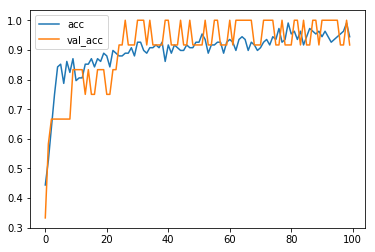

In [14]:
plt.plot(history.history['acc'], label='acc')
plt.plot(history.history['val_acc'], label='val_acc')
plt.legend()